# **10: Text Analytics**


 

##**_10.2 Sentiment Classification_**


### ***10.2.1 Loading the dataset***


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
train_ds = pd.read_csv( "/content/drive/MyDrive/Data/sentiment_train", delimiter="\t" )

train_ds.head( 5 )


,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...


In [2]:
# to increase the width of the text col
pd.set_option('max_colwidth', 800)
train_ds[train_ds.sentiment == 1][0:5]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


In [3]:
# To summarize the first 5 negative sentiments
train_ds[train_ds.sentiment == 0][0:5]


,sentiment,text
3943,0,da vinci code was a terrible movie.
3944,0,"Then again, the Da Vinci code is super shitty movie, and it made like 700 million."
3945,0,"The Da Vinci Code comes out tomorrow, which sucks."
3946,0,i thought the da vinci code movie was really boring.
3947,0,"God, Yahoo Games has this truly-awful looking Da Vinci Code-themed skin on it's chessboard right now."


In [4]:
# To summarize the first 5 positive sentiments
train_ds[train_ds.sentiment == 1][0:5]


,sentiment,text
0,1,The Da Vinci Code book is just awesome.
1,1,"this was the first clive cussler i've ever read, but even books like Relic, and Da Vinci code were more plausible than this."
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly didn't seem to hold it's own.


###**10.2.2 Exploring the dataset**

In [5]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6918 entries, 0 to 6917
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  6918 non-null   int64 
 1   text       6918 non-null   object
dtypes: int64(1), object(1)
memory usage: 108.2+ KB


It states that there are 6918 records avaliable in the data set

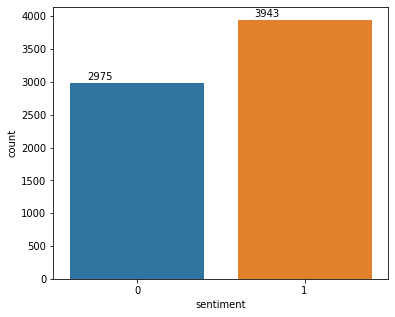

In [6]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
plt.figure( figsize=(6,5))
# create count plot
ax = sn.countplot(x='sentiment', data=train_ds)
# annotate
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+50))


###**10.2.3 Text Preprocessing**
### **Bag of words(BoW) Model**

####10.2.3.2 Creating Count Vectors for sentiment_train dataset

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer()
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )
# Get the feature names
features = feature_vector.get_feature_names()
print( "Total number of features: ", len(features))

Total number of features:  2132


Totla number of unique features 2132


In [8]:
#obtaining random sample of features
import random
random.sample(features, 10)

['keeps',
 'erm',
 'every',
 'horses',
 'hips',
 'war',
 'color',
 'hogwash',
 'starring',
 'react']

In [9]:
# converting all the documents in the dataset to count vectors
train_ds_features = count_vectorizer.transform( train_ds.text )
type(train_ds_features)

scipy.sparse.csr.csr_matrix

In [10]:
# finding the dimention of the dataframe
train_ds_features.shape

(6918, 2132)

i.e rows -reviews = 6918 and columns-features =2132

In [11]:
#To know how many actual non-zero values  are present in the sparse matrix
train_ds_features.getnnz()

65398

In [12]:
# proportion of non zero values with respect to zero values in the matrix
print( "Density of the matrix: ",
train_ds_features.getnnz() * 100 /
(train_ds_features.shape[0] * train_ds_features.shape[1]))

Density of the matrix:  0.4434010415225908


####**10.2.3.3 Displaying Document Vectors**

In [13]:
# Converting the matrix to a dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Setting the column names to the features i.e. words
train_ds_df.columns = features

In [14]:
train_ds[0:1]

,sentiment,text
0,1,The Da Vinci Code book is just awesome.


In [15]:
train_ds_df.iloc[0:1, 150:157]

,away,awesome,awesomely,awesomeness,awesomest,awful,awkward
0,0,1,0,0,0,0,0


In [16]:
train_ds_df[['the', 'da', "vinci", "code", "book", 'is', 'just', 'awesome']][0:1
]


,the,da,vinci,code,book,is,just,awesome
0,1,1,1,1,1,1,1,1


####**10.2.3.4 Removing low frequency words**

Dealing with the number of features available in the corpus is difficult. so to calculate the frequency of word occuring in the corpus 

In [17]:
# summing up the occurances of features column wise
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts_df = pd.DataFrame( dict( features = features,
counts = features_counts ) )

Histogram


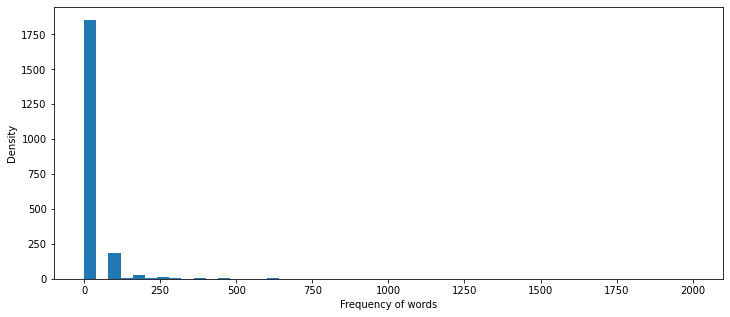

In [18]:
plt.figure( figsize=(12,5))
plt.hist(feature_counts_df.counts, bins=50, range = (0, 2000));
plt.xlabel( 'Frequency of words' )
plt.ylabel( 'Density' );


Filter the rear features by the count equal to 1

In [19]:
len(feature_counts_df[feature_counts_df.counts == 1])


1228

the words that appears only once across all the documents can be ignored.
Creating the count vector without them.


In [20]:
# Initialize the CountVectorizer
count_vectorizer = CountVectorizer(max_features=1000)
# Create the dictionary from the corpus
feature_vector = count_vectorizer.fit( train_ds.text )
# Get the feature names
features = feature_vector.get_feature_names()
# Transform the document into vectors
train_ds_features = count_vectorizer.transform( train_ds.text )
# Count the frequency of the features
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )


In [21]:
feature_counts.sort_values('counts',
ascending = False)[0:15]


,features,counts
866,the,3306
37,and,2154
358,harry,2093
675,potter,2093
138,code,2002
934,vinci,2001
178,da,2001
528,mountain,2000
104,brokeback,2000
488,love,1624


####**10.2.3.5 Removing Stop Words**

In [22]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS
#Printing first few stop words
print("Few stop words: ", list(my_stop_words)[0:10])


Few stop words:  ['hers', 'this', 'ever', 'myself', 'although', 'then', 'hence', 'often', 'us', 'who']


In [24]:
# Adding custom words to the list of stop words
my_stop_words = text.ENGLISH_STOP_WORDS.union( ['harry', 'potter', 'code', 'vinci', 'da','harry', 'mountain', 'movie',
                                                'movies'])

####**$$10.2.3.6 Creating Count Vectors**

In [25]:
# Setting stop words list
count_vectorizer = CountVectorizer( stop_words = my_stop_words,
max_features = 1000 )
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )

In [26]:
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
73,brokeback,2000
408,love,1624
39,awesome,1127
436,mission,1094
341,impossible,1093
390,like,974
745,sucks,602
743,sucked,600
297,hate,578
652,really,374


####**10.2.3.A Stemming and Lemmatization**


In [28]:
from nltk.stem.snowball import PorterStemmer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()
#Custom function for stemming and stop word removal
def stemmed_words(doc):
  ### Stemming of words
  stemmed_words = (stemmer.stem(w) for w in analyzer(doc))
  ### Remove the words in stop words list
  non_stop_words = [ word for word in list(set(stemmed_words) - set(my_stop_words)) ]
  return non_stop_words 

The custom function _stemmed_words()_ is passed as an analyser.

In [29]:
count_vectorizer = CountVectorizer( analyzer=stemmed_words,
max_features = 1000)
feature_vector = count_vectorizer.fit( train_ds.text )
train_ds_features = count_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()
features_counts = np.sum( train_ds_features.toarray(), axis = 0 )
feature_counts = pd.DataFrame( dict( features = features,
counts = features_counts ) )
feature_counts.sort_values( "counts", ascending = False )[0:15]

,features,counts
80,brokeback,1930
297,harri,1916
407,love,1837
803,suck,1378
922,wa,1142
43,awesom,1116
345,imposs,1090
433,mission,1090
439,movi,1052
393,like,823


####**10.2.3.7 Distribution of words across different sentiment**


In [34]:
# Convert the document vector matrix into dataframe
train_ds_df = pd.DataFrame(train_ds_features.todense())
# Assign the features names to the column
train_ds_df.columns = features
# Assign the sentiment labels to the train_ds
train_ds_df['sentiment'] = train_ds.sentiment

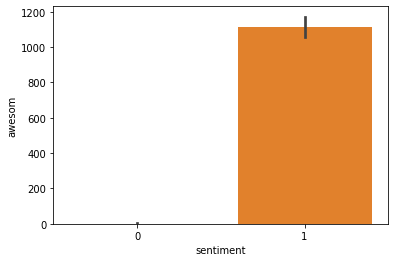

In [31]:
sn.barplot( x = 'sentiment', y = 'awesom', data = train_ds_df, estimator=sum );

the word awsom apperars in most of the positive sentiment documents.

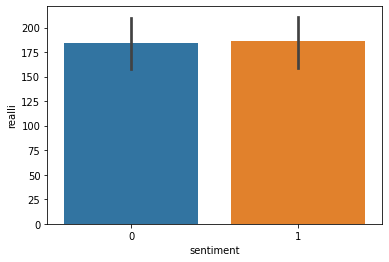

In [32]:

sn.barplot( x = 'sentiment', y = 'realli', data = train_ds_df, estimator=sum );

the word realli occurs equally amoug the sentiments

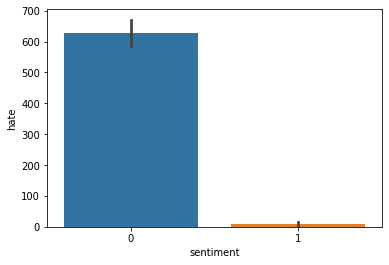

In [33]:
sn.barplot( x = 'sentiment', y = 'hate', data = train_ds_df, estimator=sum );

hate occurs mostly in negative sentiments.


##**10.3 Naive Bayes Model for Sentiment Classification**

###**10.3.1 Split the dataset**

In [35]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,
train_ds.sentiment,
test_size = 0.3,
random_state = 42 )

###**10.3.2 Build Naive Bayes Model**

In [36]:
from sklearn.naive_bayes import BernoulliNB
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

###**10.3.3 Make prediction on test case**

In [37]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )

###**10.3.4 Print clasification report**

In [38]:
from sklearn import metrics
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       873
           1       0.98      0.99      0.98      1203

    accuracy                           0.98      2076
   macro avg       0.98      0.98      0.98      2076
weighted avg       0.98      0.98      0.98      2076



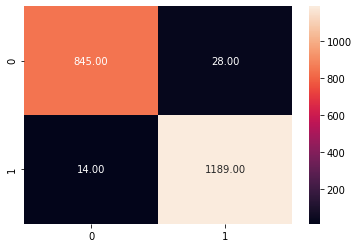

In [39]:
from sklearn import metrics
cm = metrics.confusion_matrix( test_y, test_ds_predicted )
sn.heatmap(cm, annot=True, fmt='.2f' );

##**$$10.4 Using TF-IDF Vectorizer**

Tfidfvectoriser is used to create both TF vectoriser and TF_IDF vectoriser

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer( analyzer=stemmed_words,
max_features = 1000)
feature_vector = tfidf_vectorizer.fit( train_ds.text )
train_ds_features = tfidf_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()

TF-IDF are contineous values and these contineous values associated with each class can be assumed to be distributed according to gaussian distribution.


In [41]:
from sklearn.naive_bayes import GaussianNB
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,
train_ds.sentiment,
test_size = 0.3,
random_state = 42 )
nb_clf = GaussianNB()
nb_clf.fit( train_X.toarray(), train_y )

GaussianNB(priors=None, var_smoothing=1e-09)

In [42]:
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       873
           1       0.97      0.97      0.97      1203

    accuracy                           0.97      2076
   macro avg       0.97      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076



##**10.5 Using N-grams**

In [50]:
import nltk
nltk.download('punkt')
from nltk.stem import PorterStemmer
# library for regular expressions
import re
stemmer = PorterStemmer()
def get_stemmed_tokens( doc ):
  # Tokenize the documents to words
  all_tokens = [word for word in nltk.word_tokenize(doc)]
  clean_tokens = []
  # remove the all characters other than alphabets. It takes a regex for matching.
  for each_token in all_tokens:
    if re.search('[a-zA-Z]', each_token):
      clean_tokens.append(each_token)
  # Stem the words
  stemmed_tokens = [stemmer.stem(t) for t in clean_tokens]
  return stemmed_tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
tfidf_vectorizer = TfidfVectorizer(max_features=500,
                    stop_words='english',
                    tokenizer=get_stemmed_tokens,
                    ngram_range=(1,2))

feature_vector = tfidf_vectorizer.fit( train_ds.text )
train_ds_features = tfidf_vectorizer.transform( train_ds.text )
features = feature_vector.get_feature_names()

###**10.5.1 Build the model using n-grams**

In [52]:
train_X, test_X, train_y, test_y = train_test_split( train_ds_features,
train_ds.sentiment,
test_size = 0.3,
random_state = 42 )
nb_clf = BernoulliNB()
nb_clf.fit( train_X.toarray(), train_y )
test_ds_predicted = nb_clf.predict( test_X.toarray() )
print( metrics.classification_report( test_y, test_ds_predicted ) )

              precision    recall  f1-score   support

           0       1.00      0.94      0.97       873
           1       0.96      1.00      0.98      1203

    accuracy                           0.97      2076
   macro avg       0.98      0.97      0.97      2076
weighted avg       0.97      0.97      0.97      2076

